In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')
from jsm_massfunc import CSMF, cumulative, CSMF_old, H2H_CSMF, SHMF_old
from jsm_datareduc import prep_data
import galhalo
import anaclass


### first just a single realization! see how it changes with a change in slope

In [75]:
massmat = anaclass.MassMat("../../data/3000_12_8/acc_surv_mass.npy")
massmat.prep_data()

In [76]:
index = 1232
lgMh = massmat.lgMh[index]
lgMs = galhalo.master_SHMR_1D(lgMh)
mass_bins = np.linspace(3,9,45)
CSMF_counts = cumulative(lgMs, mass_bins)

assuming a deterministic SHMR


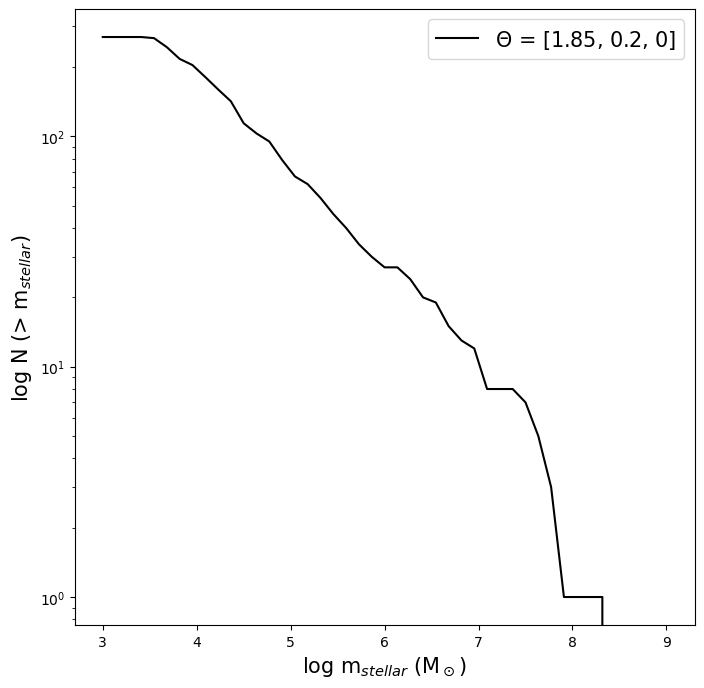

In [77]:
plt.figure(figsize=(8, 8))
plt.plot(mass_bins, CSMF_counts, color="black", label="$\Theta$ = [1.85, 0.2, 0]")
plt.yscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend(fontsize=15)
plt.show()

### now seeing what happens if you change the slope of the SHMR

In [78]:
alpha_pix = 25
alpha = np.linspace(1.5, 3, alpha_pix)
mat = np.zeros(shape=(alpha_pix, 45))

In [79]:
for i,val in enumerate(alpha):
    lgMs = galhalo.master_SHMR_1D(lgMh,alpha=val)
    mat[i] = cumulative(lgMs, mass_bins)

assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR


In [80]:
halo_masses = np.linspace(7,11,100)

B13_star = galhalo.lgMs_B13(halo_masses)
RP17_star = galhalo.lgMs_RP17(halo_masses)

/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:245: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\
/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:299: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\


In [81]:
B13_c = cumulative(galhalo.lgMs_B13(lgMh), mass_bins)

RP17_c = cumulative(galhalo.lgMs_RP17(lgMh), mass_bins)

In [82]:
norm = mpl.colors.Normalize(vmin=alpha.min(), vmax=alpha.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

colors = mpl.cm.viridis(np.linspace(0, 1, alpha_pix))

In [83]:
halo_masses

array([ 7.        ,  7.04040404,  7.08080808,  7.12121212,  7.16161616,
        7.2020202 ,  7.24242424,  7.28282828,  7.32323232,  7.36363636,
        7.4040404 ,  7.44444444,  7.48484848,  7.52525253,  7.56565657,
        7.60606061,  7.64646465,  7.68686869,  7.72727273,  7.76767677,
        7.80808081,  7.84848485,  7.88888889,  7.92929293,  7.96969697,
        8.01010101,  8.05050505,  8.09090909,  8.13131313,  8.17171717,
        8.21212121,  8.25252525,  8.29292929,  8.33333333,  8.37373737,
        8.41414141,  8.45454545,  8.49494949,  8.53535354,  8.57575758,
        8.61616162,  8.65656566,  8.6969697 ,  8.73737374,  8.77777778,
        8.81818182,  8.85858586,  8.8989899 ,  8.93939394,  8.97979798,
        9.02020202,  9.06060606,  9.1010101 ,  9.14141414,  9.18181818,
        9.22222222,  9.26262626,  9.3030303 ,  9.34343434,  9.38383838,
        9.42424242,  9.46464646,  9.50505051,  9.54545455,  9.58585859,
        9.62626263,  9.66666667,  9.70707071,  9.74747475,  9.78

assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR


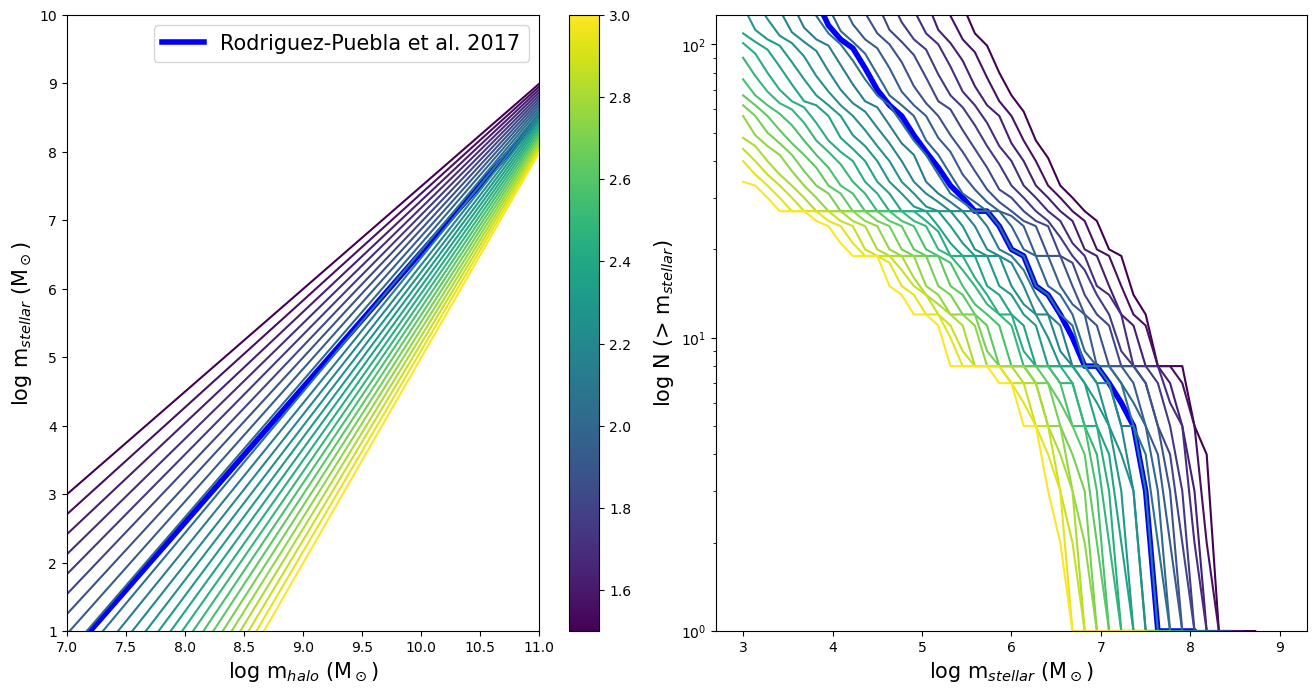

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(16,8), sharey=False)

axs[1].plot(mass_bins, RP17_c, lw=4, color="blue")

axs[0].plot(halo_masses, RP17_star, lw=4, label="Rodriguez-Puebla et al. 2017", color="blue")


for i in range(alpha_pix):
    axs[0].plot(halo_masses, galhalo.master_SHMR_1D(halo_masses, alpha=alpha[i]), color=colors[i])
    axs[1].plot(mass_bins, mat[i], color=colors[i])
    
axs[0].set_ylabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
axs[0].set_xlabel("log m$_{halo}$ (M$_\odot$)", fontsize=15)
axs[0].set_xlim(7,11)
axs[0].legend(fontsize=15)
axs[0].set_ylim(1,10)



cb = fig.colorbar(cmap, ax=axs[0])

axs[1].set_yscale("log")
axs[1].set_xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
axs[1].set_ylabel("log N (> m$_{stellar}$)", fontsize=15)
axs[1].set_ylim(10**0, 10**2.1)
plt.subplots_adjust(wspace=0.1)
plt.show()

In [85]:
galhalo.master_SHMR_1D(halo_masses, alpha=alpha[0]).shape

assuming a deterministic SHMR


(100,)

In [86]:
halo_masses.shape

(100,)